<a href="https://colab.research.google.com/github/govarthananmba768/Copper/blob/main/copper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data=pd.read_csv('/content/drive/MyDrive/Copper.csv')
data.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
data.tail(4)
data.shape

(181673, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:

data['item_date']       = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date


data['delivery date']   = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [7]:
data['quantity tons']   = pd.to_numeric(data['quantity tons'], errors='coerce')

data['customer']        = pd.to_numeric(data['customer'], errors='coerce')

data['country']         = pd.to_numeric(data['country'], errors='coerce')

data['application']     = pd.to_numeric(data['application'], errors='coerce')

data['thickness']       = pd.to_numeric(data['thickness'], errors='coerce')

data['width']           = pd.to_numeric(data['width'], errors='coerce')

data['selling_price']   = pd.to_numeric(data['selling_price'],errors ='coerce')

data['material_ref']    = data['material_ref'].str.lstrip('0')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [9]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [10]:
# Here I change the columns name

data.rename(columns={
    "id"            :     'Id',
    "item_date"     :     'Item Date',
    "quantity tons" :     'Quantity Tons',
    "customer"      :     'Customer',
    'country'       :     'Country',
    'status'        :     'Status',
    'item type'     :     'Item Type',
    'application'   :     'Application',
    'thickness'     :     'Thickness',
    'width'         :     'Width',
    'material_ref'  :     'Material Reference',
    'product_ref'   :     'Product Reference',
    'delivery date' :     'Delivery Date',
    'selling_price' :     'Selling Price'
},inplace =True)

In [11]:
data

,Id,Item Date,Quantity Tons,Customer,Country,Status,Item Type,Application,Thickness,Width,Material Reference,Product Reference,Delivery Date,Selling Price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [12]:
 # Check Unique values

for col in data.dtypes.index:
    if data[col].dtype == 'object':
        print('\n Total unique values in the column {} is ' . format(col),data[col].nunique())


 Total unique values in the column Id is  181671

 Total unique values in the column Item Date is  250

 Total unique values in the column Status is  9

 Total unique values in the column Item Type is  7

 Total unique values in the column Material Reference is  16562

 Total unique values in the column Delivery Date is  26


In [13]:
# Checking the duplicate values

duplicates=data[data.duplicated()]
print('Duplicate values in the data set',duplicates)

Duplicate values in the data set Empty DataFrame
Columns: [Id, Item Date, Quantity Tons, Customer, Country, Status, Item Type, Application, Thickness, Width, Material Reference, Product Reference, Delivery Date, Selling Price]
Index: []


In [14]:
#  Checking the Null Values:

data.isna().sum()

Id                        2
Item Date                 3
Quantity Tons             1
Customer                  1
Country                  28
Status                    2
Item Type                 0
Application              24
Thickness                 1
Width                     0
Material Reference    77919
Product Reference         0
Delivery Date             3
Selling Price             1
dtype: int64

In [15]:
# material_ref has large set of null values, so replacing them with unknown
data['Material Reference'].fillna('unknown', inplace=True)

data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  181631 non-null  object 
 1   Item Date           181631 non-null  object 
 2   Quantity Tons       181631 non-null  float64
 3   Customer            181631 non-null  float64
 4   Country             181631 non-null  float64
 5   Status              181631 non-null  object 
 6   Item Type           181631 non-null  object 
 7   Application         181631 non-null  float64
 8   Thickness           181631 non-null  float64
 9   Width               181631 non-null  float64
 10  Material Reference  181631 non-null  object 
 11  Product Reference   181631 non-null  int64  
 12  Delivery Date       181631 non-null  object 
 13  Selling Price       181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


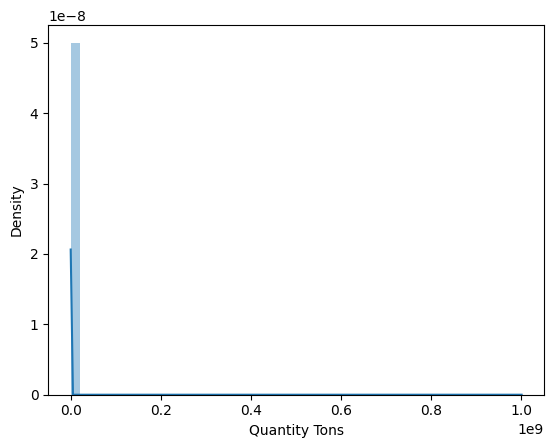

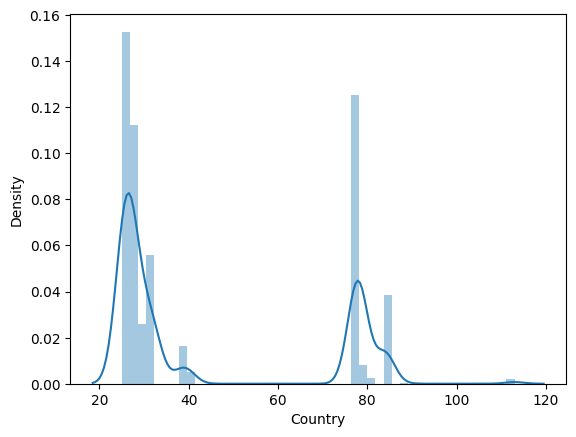

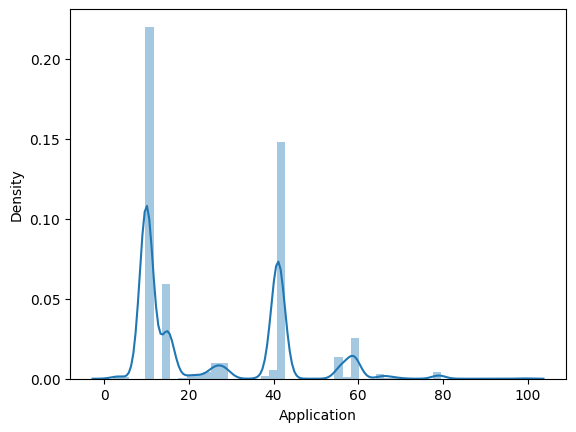

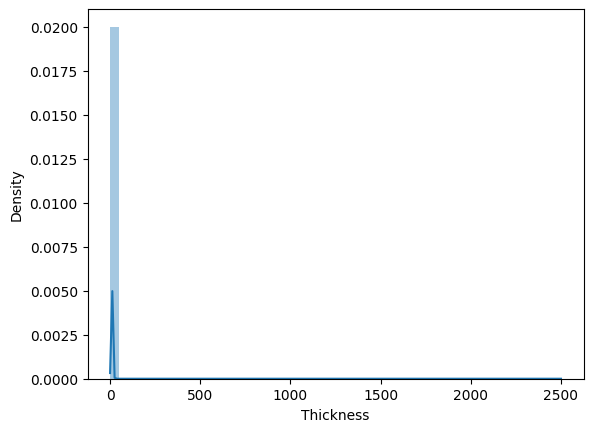

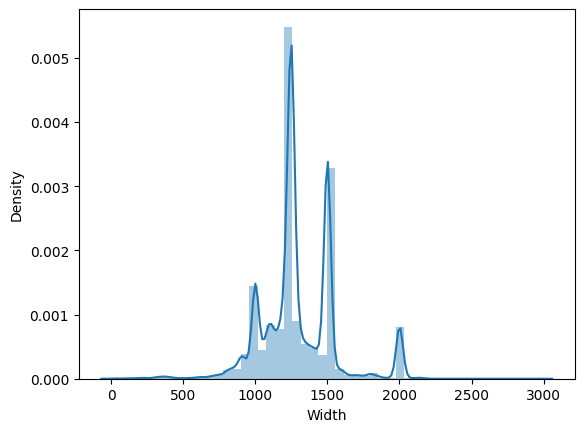

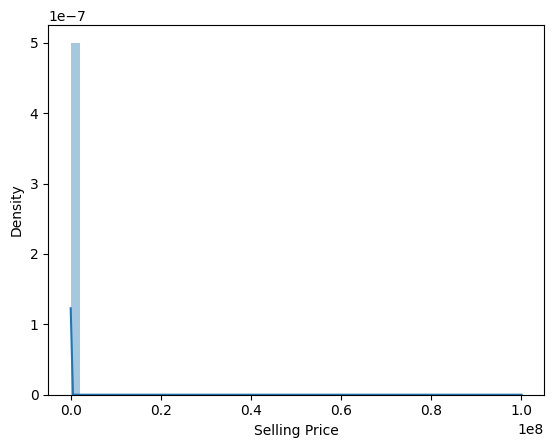

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['Quantity Tons'])   # skewed
plt.show()
sns.distplot(data['Country'])
plt.show()
sns.distplot(data['Application'])
plt.show()
sns.distplot(data['Thickness'])    # skewed
plt.show()
sns.distplot(data['Width'])
plt.show()
sns.distplot(data['Selling Price']) # skewed
plt.show()

In [18]:
mask1 = data['Selling Price'] <= 0
print(mask1.sum())
data.loc[mask1, 'Selling Price'] = np.nan

mask1 = data['Quantity Tons'] <= 0
print(mask1.sum())
data.loc[mask1, 'Quantity Tons'] = np.nan

mask1 = data['Thickness'] <= 0
print(mask1.sum())
data.loc[mask1, 'Thickness'] = np.nan

7
4
0


In [19]:
data.isnull().sum()

Id                    0
Item Date             0
Quantity Tons         4
Customer              0
Country               0
Status                0
Item Type             0
Application           0
Thickness             0
Width                 0
Material Reference    0
Product Reference     0
Delivery Date         0
Selling Price         7
dtype: int64

In [20]:
data.dropna(inplace=True)
len(data)

181620

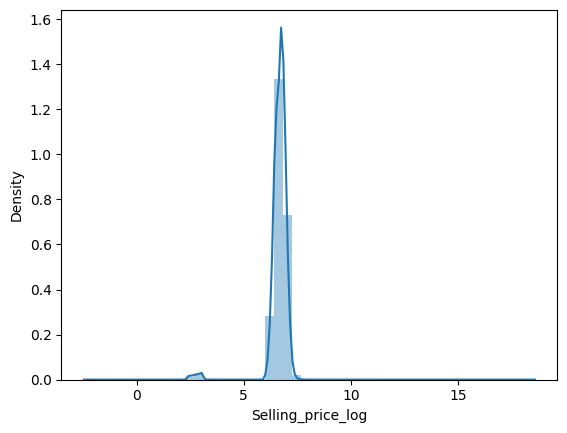

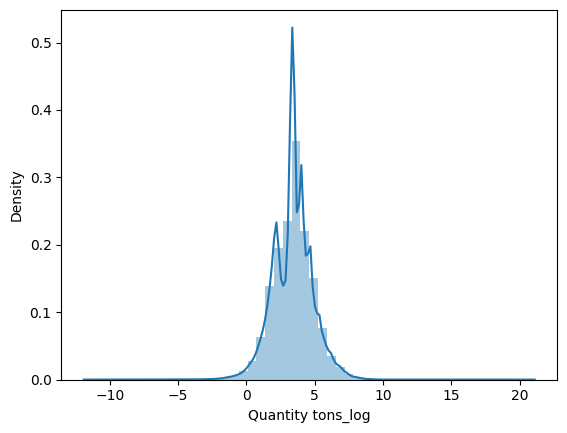

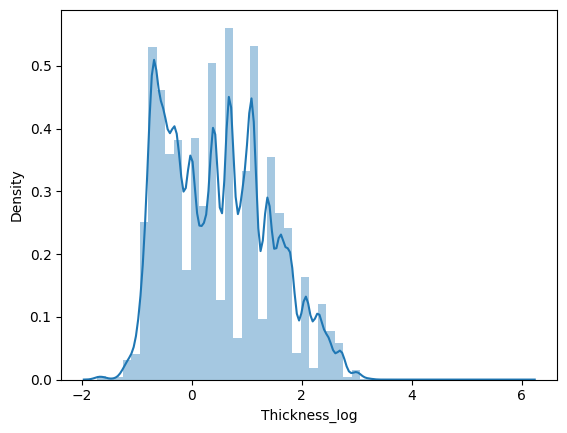

In [21]:
# Transformation

data['Selling_price_log'] = np.log(data['Selling Price'])
sns.distplot(data['Selling_price_log'])
plt.show()

data['Quantity tons_log'] = np.log(data['Quantity Tons'])
sns.distplot(data['Quantity tons_log'])
plt.show()

data['Thickness_log'] = np.log(data['Thickness'])
sns.distplot(data['Thickness_log'])
plt.show()

<Axes: >

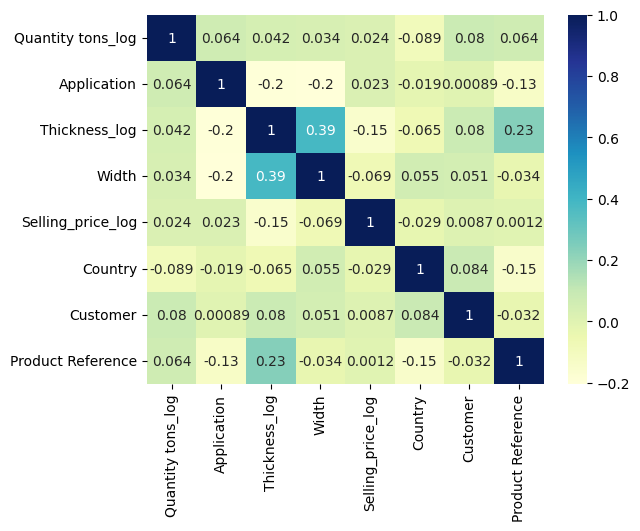

In [22]:
x=data[['Quantity tons_log','Application','Thickness_log','Width','Selling_price_log','Country','Customer','Product Reference']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

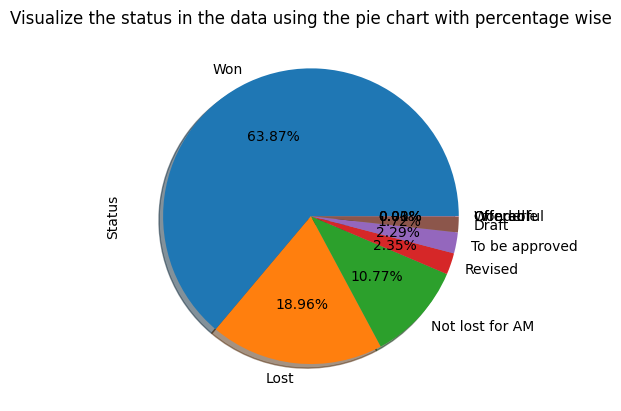

In [23]:
data['Status'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the status in the data using the pie chart with percentage wise")
plt.show()

In [24]:
data['Status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

DECISION TREE REGRESSOR


1.   Encode categorical features
2.   Test and Train split
3.   Define Hyperparameters for GridSearchCV
4.   Train the DecisionTreeRegressor with best parameters
5.   Evalution metrics
6.   Predict the selling price for new values
7.   Save the DecisionTreeRegressor model



> Indented block



In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [28]:
X=data[['Quantity tons_log','Status','Item Type','Application','Thickness_log','Width','Country','Customer','Product Reference']]
y=data['Selling_price_log']

In [33]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Item Type']])
X_ohe = ohe.fit_transform(X[['Item Type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['Status']])
X_be = ohe2.fit_transform(X[['Status']]).toarray()

In [34]:
# independent features after encoding & Scaling
X = np.concatenate((X[['Quantity tons_log', 'Application', 'Thickness_log', 'Width','Country','Customer','Product Reference']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# decision tree
dtr = DecisionTreeRegressor()

In [37]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [38]:
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [39]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [40]:
# Evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.025399188784262585
R-squared: 0.9213575044281468


In [41]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [709.71121192]


In [42]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
print(len(data))
data.head(3)
data1 = data[data['Status'].isin(['Won', 'Lost'])]
len(data1)

DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [45]:
Y = data1['Status']
X= data1[['Quantity tons_log','Selling_price_log','Item Type','Application','Thickness_log','Width','Country','Customer','Product Reference']]



In [48]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Item Type']])
X_ohe = ohe.fit_transform(X[['Item Type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)

In [49]:
# independent features after encoding
X = np.concatenate((X[['Quantity tons_log', 'Selling_price_log','Application', 'Thickness_log', 'Width','Country','Customer','Product Reference']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9093044383877329
Confusion Matrix:
[[ 8480  1998]
 [ 2095 32556]]


Confusion Matrix:
[[ 8480  1998]
 [ 2095 32556]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10478
           1       0.94      0.94      0.94     34651

    accuracy                           0.91     45129
   macro avg       0.87      0.87      0.87     45129
weighted avg       0.91      0.91      0.91     45129



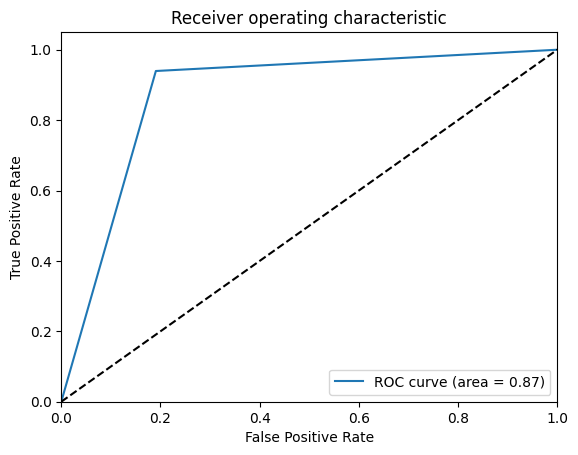

In [52]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [55]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)